# Workshop NEGI

![](pandas_logo.png)

### The Pandas library allows extensive applicability of functions when talking about data. With Pandas, analyzing data has become an easier task.

# Pandas module

<img src="img/Pandas.png">

### There are two things you must know about: Series and DataFrame.

Series is a one-dimensional ndarray with axis labels. When we create a series, this is what be obtain:
series1 = pd.Series([‘Ana’,’Maria’,’Joana’])


<img src="img/Graphics1.png">

And what is a DataFrame? It’s basically a table with data…

<img src="img/Graphics2.png">

A DataFrame can be created:

<img src="img/Graphics3.png">

In [2]:
import pandas as pd

In [3]:
df1 = pd.DataFrame([[1,2,3],[4,5,6]], columns=['col1', 'col2', 'col3'])

And the indexes can be numeric, like the example before, or not. For example:

<img src="img/Graphics4.png">

In [4]:
df2 = pd.DataFrame([[1, 2], [4, 5], [7, 8]],index=['cobra', 'viper', 'sidewinder'],columns=['max_speed', 'shield'])

We can also create a DataFrame using a dictionary (explain what a dictionary in python is in case there is someone that does not know):

<img src="img/Graphics5.png">

In [5]:
mydict = [{'a': 1, 'b': 2, 'c': 3, 'd': 4},
{'a': 100, 'b': 200, 'c': 300, 'd': 400},
{'a': 1000, 'b': 2000, 'c': 3000, 'd': 4000 }]
df3 = pd.DataFrame(mydict)

Let's look into the data in df3 and types of each column

In [6]:
df3.head()

,a,b,c,d
0,1,2,3,4
1,100,200,300,400
2,1000,2000,3000,4000


In [7]:
df3.dtypes

a    int64
b    int64
c    int64
d    int64
dtype: object

Now we want to select specific rows and columns. There are two ways of doing this (iloc and loc methods). With iloc, we select the indexes of the rows/columns we want to select. With loc we use the labels.

df.iloc[rows,columns]

Selecting a single column, you can obtain two results: a Serie or a DataFrame.

In [8]:
print(type(df3.iloc[0])) #Series
print(type(df3.iloc[[0]])) #DataFrames

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


<img src="img/Graphics11.png">

**Now lets select values from the dataframe**  
Try the different examples and see what you obtain:

In [9]:
df3.iloc[[0, 1]]

,a,b,c,d
0,1,2,3,4
1,100,200,300,400


In [10]:
df3.iloc[:3]

,a,b,c,d
0,1,2,3,4
1,100,200,300,400
2,1000,2000,3000,4000


In [11]:
df3.iloc[0, 1]

2

In [12]:
df3.iloc[[0, 2], [1, 3]]

,b,d
0,2,4
2,2000,4000


In [13]:
df3.iloc[:,2:4]

,c,d
0,3,4
1,300,400
2,3000,4000


In [14]:
df3.iloc[1:3, 0:3]

,a,b,c
1,100,200,300
2,1000,2000,3000


In python an interval [3:6] translate to an interval from 3 (inclusive) to 6 (exclusive). Meaning that you will get things from positions 3,4 and 5, but not from 6.

Now try the .loc method: 

In [15]:
df2.loc['viper']
#df2.loc[['viper', 'sidewinder']]
#df2.loc['cobra', 'shield']
#df2.loc['cobra':'viper', 'max_speed']
#df2.loc[df2['shield'] > 6]
#df2.loc[df2['shield'] > 6, ['max_speed']]

max_speed    4
shield       5
Name: viper, dtype: int64

Data Frames can also be loaded from SQL Files with SQL Queries that we learned from the previous module.

<img src="img/lets_do_it.jpg">

In [16]:
import sqlite3

In [17]:
import os

##### In this situation, as part of this workshop, we will open a file in SQLite format. It is possible to open in other formats and with other methods. For this procedure, we will an auxiliary library (sqlite3).

Alright, but now the goal is to get the a DataFrame with all infomation from `items`, `item_sales` and `outlets` per `Item_Identifier`

In [18]:
dir_=os.path.join('data','WorkshopDB.db')
connection_data = sqlite3.connect(dir_) 

# the 3 ' is normally used to write long notes in python programming but
# it can also be used to assign a multiline string to a variable
query = ''' select * from outlets
join item_sales on item_sales.Outlet_Identifier = outlets.Outlet_Identifier
join items on items.Item_Identifier = item_sales.Item_Identifier
''' 

df = pd.read_sql_query(query, connection_data) # Guarda-lo em Pandas Dataframe

Alright let's look to our data frame

**Ex1**   
Show Head of df

In [19]:
df.head()

,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP
0,OUT049,1999,Medium,Tier 1,Supermarket Type1,DRA24,OUT049,982.7208,DRA24,NaN,Regular,0.039735,Soft Drinks,165.7868
1,OUT049,1999,Medium,Tier 1,Supermarket Type1,DRA24,OUT049,982.7208,DRA24,NaN,Regular,0.069909,Soft Drinks,163.2868
2,OUT049,1999,Medium,Tier 1,Supermarket Type1,DRA24,OUT049,982.7208,DRA24,19.35,Regular,0.039895,Soft Drinks,162.4868
3,OUT049,1999,Medium,Tier 1,Supermarket Type1,DRA24,OUT049,982.7208,DRA24,19.35,Regular,0.039921,Soft Drinks,163.3868
4,OUT049,1999,Medium,Tier 1,Supermarket Type1,DRA24,OUT049,982.7208,DRA24,19.35,Regular,0.039990,Soft Drinks,165.0868


**Ex 2**  
Select the first 2 columns from the df

**Ex3**  
How many rows and columns does the table have?

**Ex4**   
Show types of the different columns

**Ex5**   
Select only the columns: `Item_Fat_Content` , `Item_Type`

![ChessUrL](https://media1.tenor.com/images/9fc9fa0ed4ad8077a9447b27296771f0/tenor.gif?itemid=4968318 "chess")

## 2. Pre-processing data and analysis

### 2.0 Overview of the Data

In [20]:
df=pd.read_csv('data/data.csv')

In [21]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### 2.0.1 Data types

In [22]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


Some important types of objects in python:  
 - **integers**  : int/int32/in64        : \[1,2,3,4\]  
 - **float**     : float/float32/float64 : \[1.7 ,2.1 ,3.4, 5.4\]  
 - **string**    : str : \['palavras','qualquer carachcter23423f95||??'\]

Alright, but in that case what type of object is the column `Item_Identifier`?  

What happen was that pandas was not confident enough to determine one type of object for that column and decided to leave it as object datatype.

<img src="img/pandas_object.jpg">

Let's look at our data again again:

In [23]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In order to understand the importance of each column we should understand what type and subtype of data we have.
  - Qualitative(categorical):  
    - Nominal
    - Ordinal
  - Quantitative(numerical):
    - Discrete
    - Continuous  

![title](img/Data_type_subtype.png)

In [24]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [25]:
df.count()

Item_Identifier              8523
Item_Weight                  7060
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  6113
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64

## 2.1 Data problems

### 2.1.1 NULL / NaN values

Unfortunately it seems that we have some missing values in Item_Weight maybe we have some missing values in other non numerical columns. Let's check it out.

In [26]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Null values are normally represented with the string "NaN" look at `Item_Weight` in the output of the next Data Frame

In [27]:
df[df.Item_Weight .isnull()].head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432


When this happens we need to make a choice:
  - Ignore the rows with missing data
  - Ignore the columns with missing data
  - Replace the values with a technique like Mean of the values, Regression...  

To decide this lets use simple math:  
if we drop those lines how much information do we lose?

In [28]:
df.shape

(8523, 12)

In [29]:
df.dropna().shape

(4650, 12)

In [30]:
df.dropna().shape[0]/df.shape[0]

0.5455825413586766

This means if we drop the columns with missing values we will be losing about 45% of the lines and that is a lot of information
...so?

Let's ignore the columns

In [31]:
df=df.dropna(axis =1)
df.shape

(8523, 10)

**Note** : A lot of more should be taken into account when discarding values because you can lose very valuable information on the process

### 2.1.2 Bad quality data

In cases where data collection implies human action, which is very common in Industrial world, we can end up with situations like this.

In [32]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

To solve this we will change the values with wrong strings to right strings.  
  
>To do this we will use dictionaries. with the following format:  
{'string we want to change': 'the right string',....  
which will tell to the **map function** how we want to change strings.  

**Map function** is as the name says a function that picks in a representation (our dictionary) and applies it to the Panda Serie.  

**note**:we also have to put in the dictionary the right strings otherwise the values will be changed to NaN and we do not want that.


In [33]:
df.Item_Fat_Content = df.Item_Fat_Content.map({'Low Fat':'Low Fat','Regular':'Regular','LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [34]:
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Ok Now let's unload the power of pandas!!!!

![](img/pandas_power.jpg)

## 2.2 - Univariate Analysis

Univariate Analysis is, in the majority of cases, the primary choice of analysing unique label behaviour. It can be inferential or descriptive.

We can, for example, check general statistical tendencies, using the .describe() method.

In [35]:
df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


Checking the correlation between Item_Outlet_Sales and Item_Visibility	

In [36]:
labels = ['Item_Outlet_Sales', 'Item_Visibility']
df[labels].corr()

,Item_Outlet_Sales,Item_Visibility
Item_Outlet_Sales,1.000000,-0.128625
Item_Visibility,-0.128625,1.000000


### 2.1.1 Distribution of `Item_Outlet_Sales`

Do all Items have the same amount of sales?

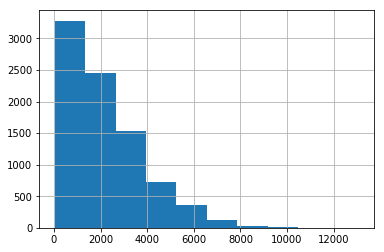

In [37]:
df['Item_Outlet_Sales'].hist()

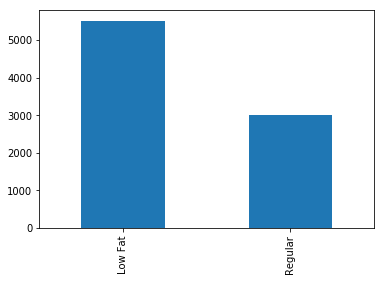

In [38]:
df['Item_Fat_Content'].value_counts().plot.bar()

## 2.3 - Multivariate Analysis

In Multivariate Analysis, more than one statistical outcome variable at a time is considerate.

As seen before, we can now use the .corr method for the all dataset.

In [39]:
df.corr()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Visibility,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,-0.128625,0.567574,-0.049135,1.000000


Also verifying visualy the correlation, with the use of Seaborn library.

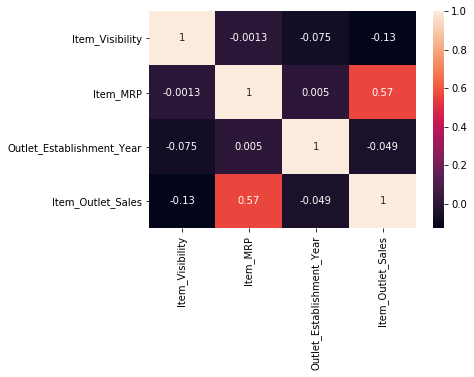

In [41]:
import seaborn as sns
%matplotlib inline

#Choosing the numerical labels
numerical = ['Item_Visibility','Item_MRP', 'Outlet_Establishment_Year','Item_Outlet_Sales']

df_numerical = df[numerical]

sns.heatmap(df_numerical.corr(), annot=True)

Some Multivariate Analysis plots:  
Do the clients spend more money on Low fat items or Regular Fat items?

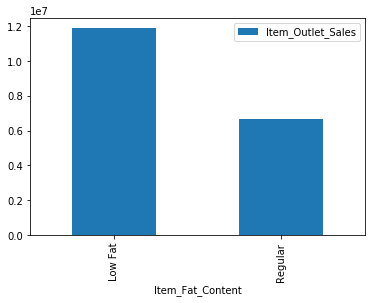

In [66]:
df_stats = df.groupby('Item_Fat_Content').sum()[[ 'Item_Outlet_Sales','Item_Visibility']]
df_stats.plot.bar(y='Item_Outlet_Sales')

Which of those are more Visible?

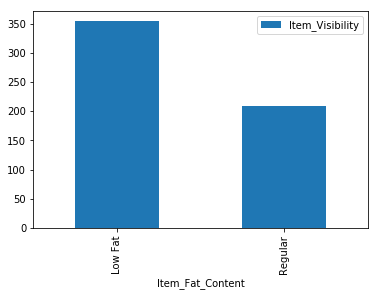

In [67]:
df_stats.plot.bar(y='Item_Visibility')

Is this why clients buy more stuff?

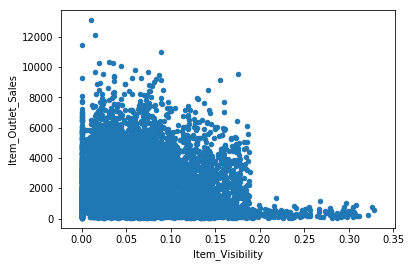

In [91]:
df.plot.scatter('Item_Visibility','Item_Outlet_Sales')

### Ask Questions to the dataset

### Thank you and remember Google is your best friend.

![ChessUrl](https://raw.githubusercontent.com/nucleodatasciencefct/PythonWorkshop-BioFisNDS/master/Workshop/OpenCV/media/google.jpg "chess")